# 📊 Superstore Sales & Profit Analysis  
**Author:** Lisseth Vivanco  
**Date:** June 2025  

---

# 1. Business Context & Objective  

With growing demands and cut-throat competition in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. The company Superstore seeks to understand which products, regions, categories and customer segments they should target or avoid.

## 2. Data Understanding (Overview & Quality Check)

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_excel('Sample - Superstore.xlsx')

### 2.1 Initial Exploration

In [13]:
# Dataset shape
df.shape
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
# Number of duplicate rows
df.duplicated().sum()
# Number of missing values per column
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.2 Value Distributions

In [16]:
# Summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
# Unique values in categorical columns
print(df['Category'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['Discount'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]


In [19]:
# Value counts for categorical columns
print(df['Category'].value_counts())
print(df['Segment'].value_counts())
print(df['Region'].value_counts())
print(df['Ship Mode'].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


### 2.3 Outliers & Skewness

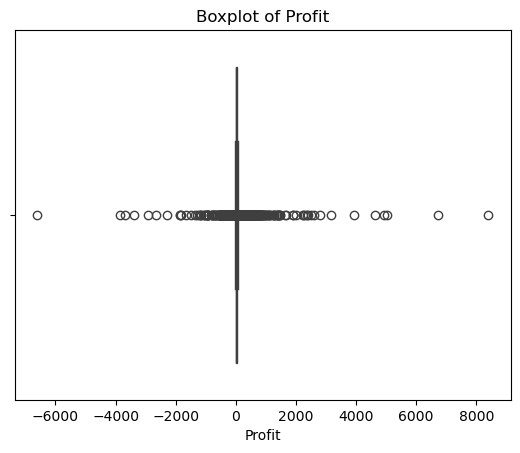

In [285]:
# Profit Boxplot
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

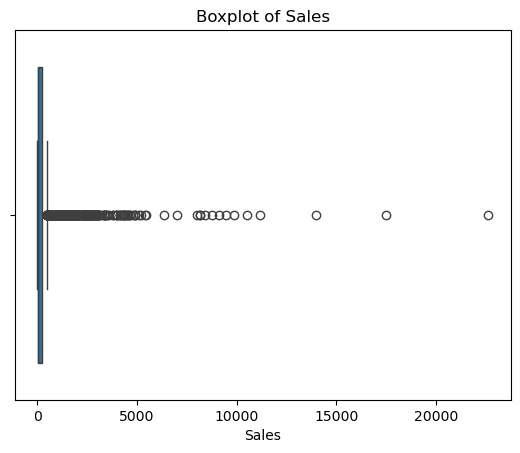

In [287]:
# Sales Boxplot 
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.show()

## 3. Data Cleaning and Transformation

### 4.1 Date parsing & new columns


In [549]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Day'] = df['Order Date'].dt.day_name()
df['Month-Year'] = df['Order Date'].dt.to_period('M')

In [54]:
df['Sales'] = df['Sales'].round(2)
df['Profit'] = df['Profit'].round(2)

### 4.2 Calculated columns 

In [57]:
df['Discount (%)'] = df['Discount'] * 100

In [59]:
print(df['Discount (%)'].unique())

[ 0. 45. 20. 80. 30. 50. 70. 60. 32. 10. 40. 15.]


In [61]:
df['Unit Price Calc'] = df['Sales'] / (df['Quantity'] * (1 - (df['Discount (%)'] / 100)))

df[['Product Name', 'Sales', 'Quantity', 'Discount', 'Unit Price Calc', 'Profit']].sample(10)

,Product Name,Sales,Quantity,Discount,Unit Price Calc,Profit
6052,Xerox 1970,11.95,3,0.2,4.979167,4.03
5288,Xerox 1919,163.96,4,0.0,40.990000,80.34
8016,Nu-Dell Executive Frame,60.67,6,0.2,12.639583,12.89
846,I Need's 3d Hello Kitty Hybrid Silicone Case C...,83.72,7,0.0,11.960000,23.44
9841,Newell 346,5.76,2,0.0,2.880000,1.67
8282,Star Micronics TSP800 TSP847IIU Receipt Printer,600.53,2,0.3,428.950000,137.26
9759,Office Star - Professional Matrix Back Chair w...,1403.92,5,0.2,350.980000,70.20
2972,Carina Double Wide Media Storage Towers in Nat...,259.14,4,0.2,80.981250,-51.83
812,Sony 16GB Class 10 Micro SDHC R40 Memory Card,25.78,2,0.0,12.890000,2.58
3388,"Performers Binder/Pad Holder, Black",50.45,6,0.7,28.027778,-33.64


In [63]:
df['Unit Price Calc'] = df['Unit Price Calc'].round(2)

### 4.3 Removed irrelevant columns


In [66]:
df.drop(columns=['Row ID'], inplace=True)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Profit Drivers
Objective: Identify key variables influencing profitability.

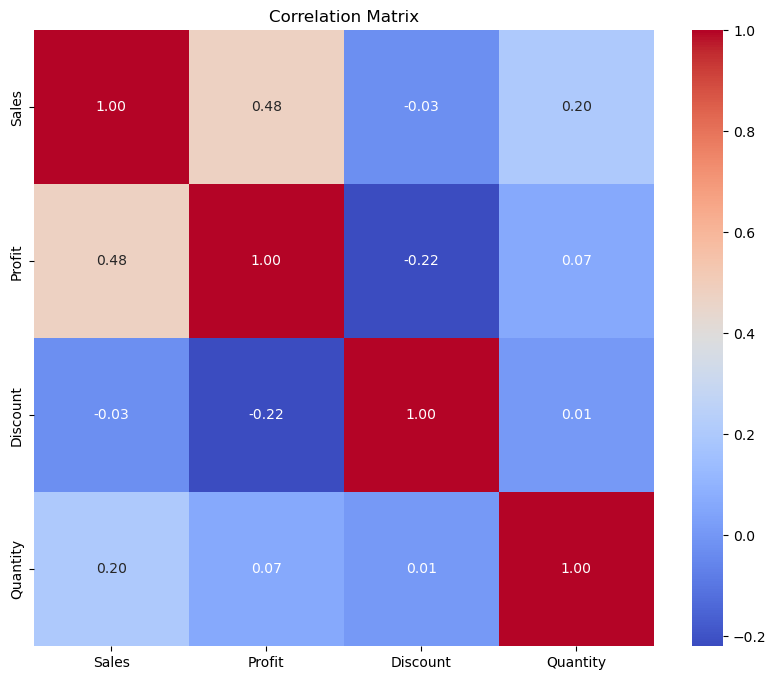

In [422]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows a moderate positive relationship (0.48) between Sales and Profit, suggesting that higher sales generally lead to higher profits, though the relationship is not strong.
There is a negative correlation between Discount and Profit (-0.22), indicating that increasing discounts tends to reduce profit. Quantity has a weak relationship with both profit and discount.

Insight:
Discounting is not significantly correlated with higher sales but does affect profit negatively.


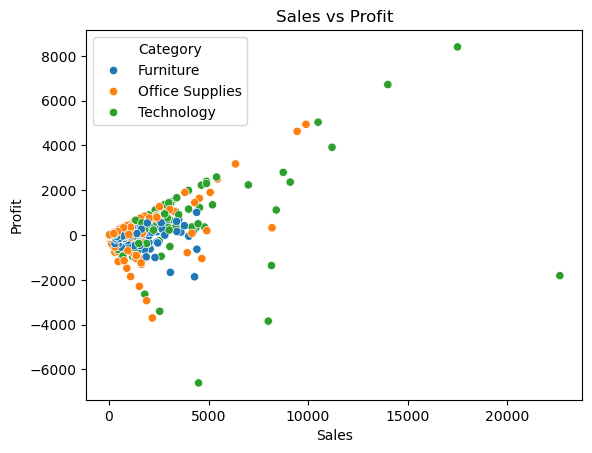

In [426]:
#Sales vs Profit (by Category)
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit")
plt.show()

- Technology products show a wide range of outcomes, including the highest profits and the highest losses, indicating high variability and risk.
- Office Supplies often lead to losses, even with medium-level sales, suggesting these items may be over-discounted or low-margin.
- Furniture typically generates small profits or small losses, clustering tightly around the breakeven line, but tends more toward the loss side.

Insight: Office Supplies is the most loss-prone category, while Technology is volatile but potentially rewarding. Furniture lacks strong profitability.


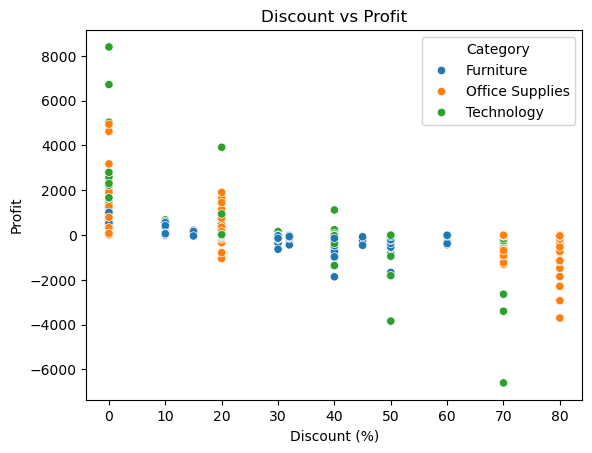

In [428]:
#Discount vs Profit (by Category)
sns.scatterplot(data=df, x="Discount (%)", y="Profit", hue="Category")
plt.title("Discount vs Profit")
plt.show()

- Products with 0% discount tend to generate the highest profits.
- Heavy discounts (70–80%) often result in substantial losses, particularly in Office Supplies.
- The most extreme case shows a product discounted at 70% causing a loss of over $6,000, likely a high-value item from the Technology or Office Supplies category.

Insight:
Aggressive discounting does not translate to higher profit — instead, it’s a key risk factor for major financial losses.


### 4.2 Profit by Segment, Category & Region

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/2908135852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_segment.values, y=profit_by_segment.index, palette='pastel')


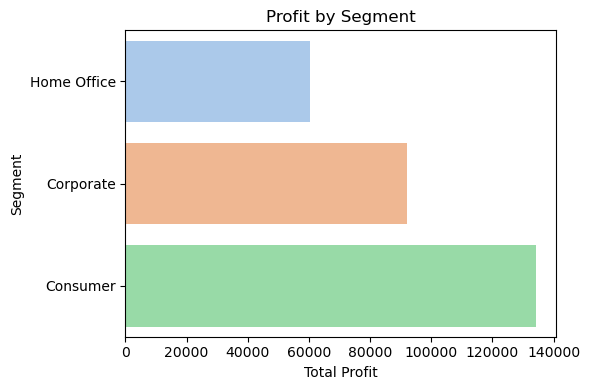

In [219]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_segment.values, y=profit_by_segment.index, palette='pastel')
plt.title("Profit by Segment")
plt.xlabel("Total Profit")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

- The Consumer segment is the most profitable, generating nearly $140,000 in total profit.
- Corporate follows with moderate profit, while Home Office is the least profitable, showing a much smaller contribution.

Insight:
 The Consumer market drives profitability. Marketing and product strategies should prioritize this segment over Home Office.

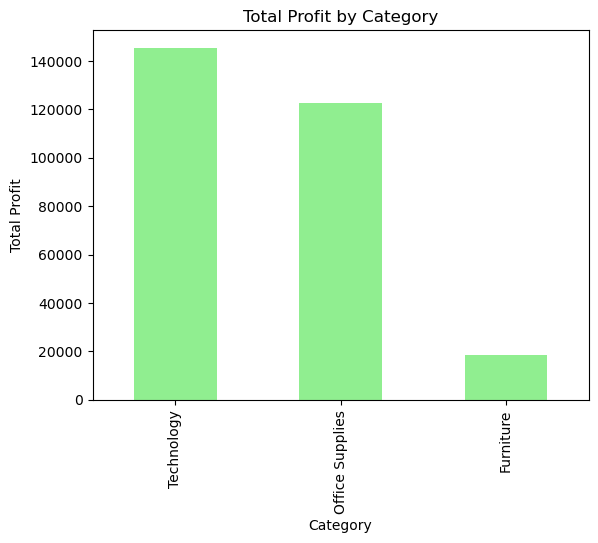

In [453]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.plot(kind='bar', title='Total Profit by Category', color='lightgreen')
plt.ylabel('Total Profit')
plt.show()

- Technology is the most profitable category, followed by Office Supplies.
- Furniture lags far behind, contributing the lowest profit overall.

Insight:
 Technology products are high-value profit drivers. In contrast, the Furniture category underperforms and may require review.

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/2108684489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_subcat.values, y=profit_by_subcat.index, palette='coolwarm')


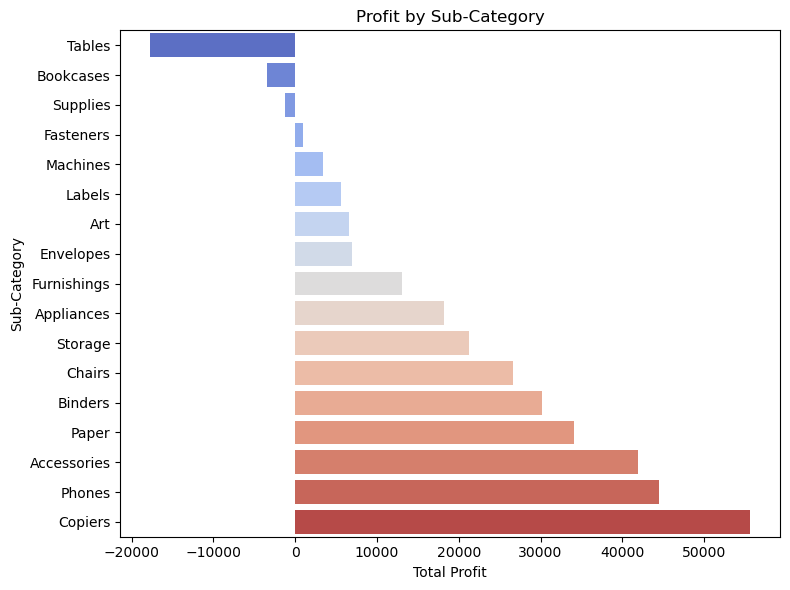

In [157]:
profit_by_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=profit_by_subcat.values, y=profit_by_subcat.index, palette='coolwarm')
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

- Copiers, Phones, and Accessories are the most profitable sub-categories.
- Tables show the largest loss, close to $20,000, followed by Bookcases and Supplies.

Insight:
Losses in specific sub-categories like Tables suggest potential over-discounting, poor sales volume, or high returns.

Text(0.5, 1.0, 'Profit by Region')

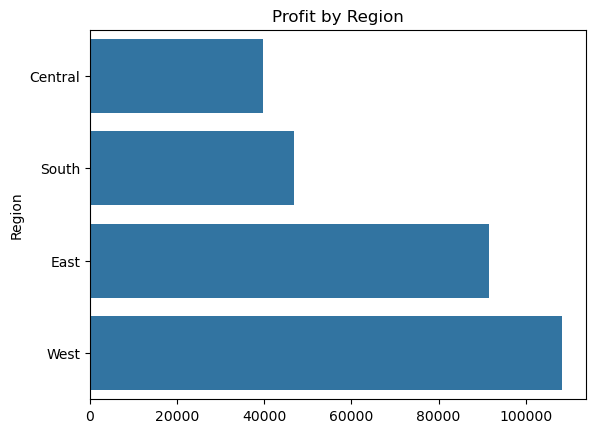

In [449]:
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=profit_by_region.values, y=profit_by_region.index)
plt.title("Profit by Region")

- The West region generates the highest total profit, followed closely by the East.
- South and especially Central regions are less profitable.

Insight:
West and East are the key regional markets. Strategic efforts can be scaled back in the Central region or restructured.

#### City level perfomance

In [474]:
# Lista de ciudades por región
cities_by_region = df.groupby('Region')['City'].unique()

# Lo convertimos a un DataFrame más visual
cities_by_region_df = cities_by_region.reset_index()
cities_by_region_df.columns = ['Region', 'Cities']

cities_by_region_df

,Region,Cities
0,Central,"[Fort Worth, Madison, Fremont, Houston, Richar..."
1,East,"[Philadelphia, Dover, New York City, Troy, Col..."
2,South,"[Henderson, Fort Lauderdale, Concord, Melbourn..."
3,West,"[Los Angeles, Seattle, West Jordan, San Franci..."


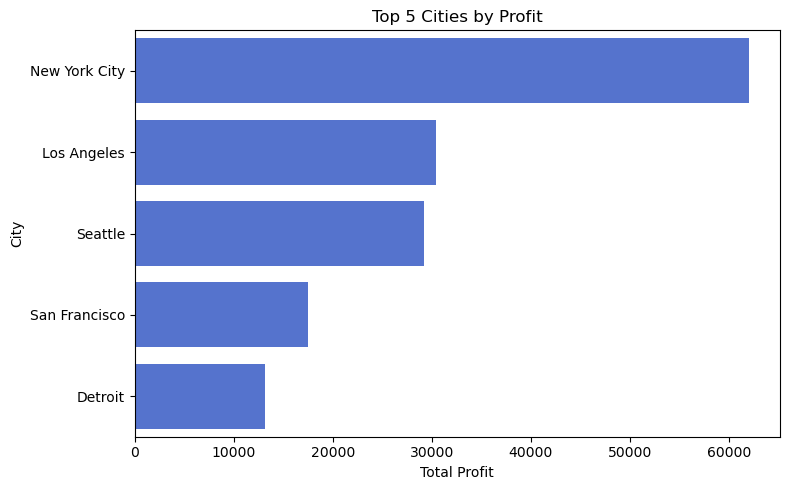

In [163]:
profit_by_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_city.values, y=profit_by_city.index, color='royalblue')
plt.title("Top 5 Cities by Profit")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.tight_layout()
plt.show()

- New York City is by far the most profitable city, generating over $60,000 in total profit. Los Angeles and Seattle have nearly the same profit levels, despite differences in sales volume. San Francisco and Detroit complete the top 5 but with significantly lower profit margins.

Insight:
New York City leads in profitability. Los Angeles and Seattle perform equally in profit but differ in efficiency per sale.

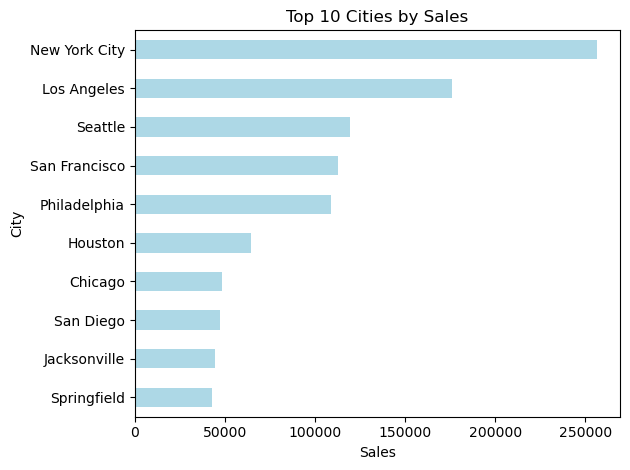

In [113]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', title='Top 10 Cities by Sales', color='lightblue')
plt.xlabel('Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

- New York City also has the highest total sales, exceeding $250,000. Los Angeles and Seattle follow in terms of sales volume. Cities like Chicago, Houston, and San Diego have moderate sales but smaller profit margins.

Insight:
High sales do not always equal high profit — profit efficiency must be monitored closely.

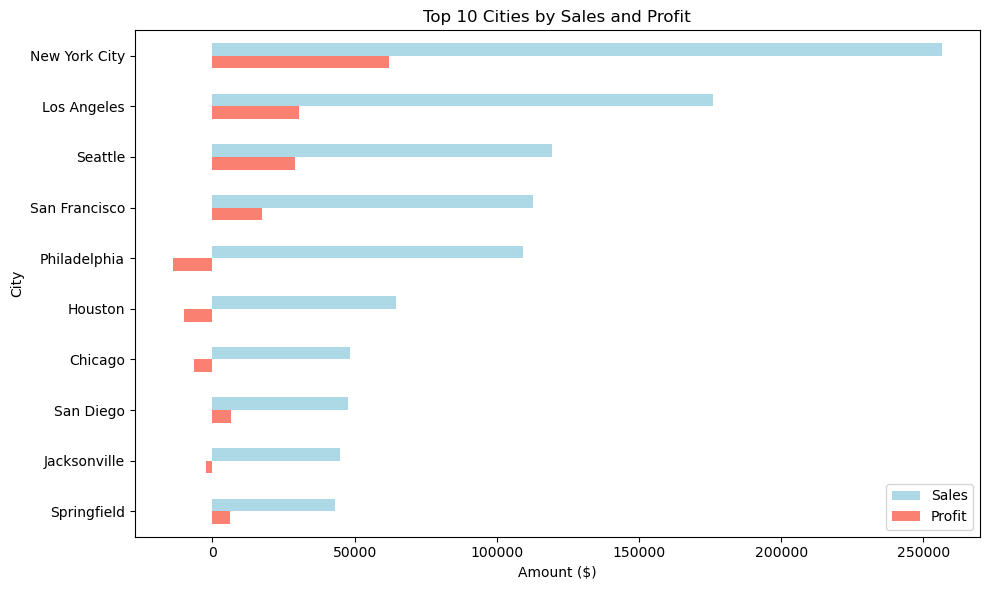

In [272]:
# Sales and Profit by City
city_summary = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False).head(10)

city_summary[['Sales', 'Profit']].plot(kind='barh', figsize=(10,6), color=['lightblue', 'salmon'])
plt.title('Top 10 Cities by Sales and Profit')
plt.xlabel('Amount ($)')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

- New York City leads in both sales and profit, but high sales don’t always mean high profit—Los Angeles matches Seattle in profit despite greater sales. Philadelphia shows the greatest loss, with several other cities also reporting negative profit.

Insight: This highlights the need to reassess pricing strategies, discount policies, or product offerings in these underperforming locations.

### Clients

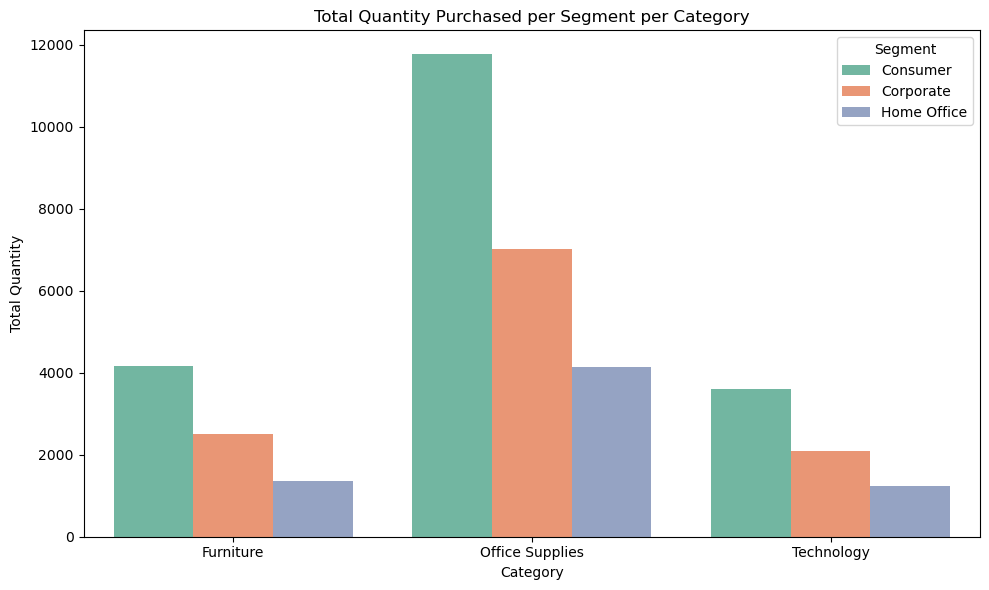

In [445]:
quantity_by_segment_category = df.groupby(['Segment', 'Category'])['Quantity'].sum().reset_index()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(
    data=quantity_by_segment_category,
    x='Category',
    y='Quantity',
    hue='Segment',
    palette='Set2'
)

plt.title('Total Quantity Purchased per Segment per Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

- The Consumer segment consistently purchases the highest quantity across all categories, especially in Office Supplies, where the volume significantly surpasses both Corporate and Home Office. Corporate follows as the second-largest purchaser, while Home Office contributes the least in every category.

Insights:Consumer clients have higher frequency or demand for everyday business items, particularly for Office Supplies, which are likely used in personal or small business settings.

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/3733540302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product Name', data=top, palette='viridis')


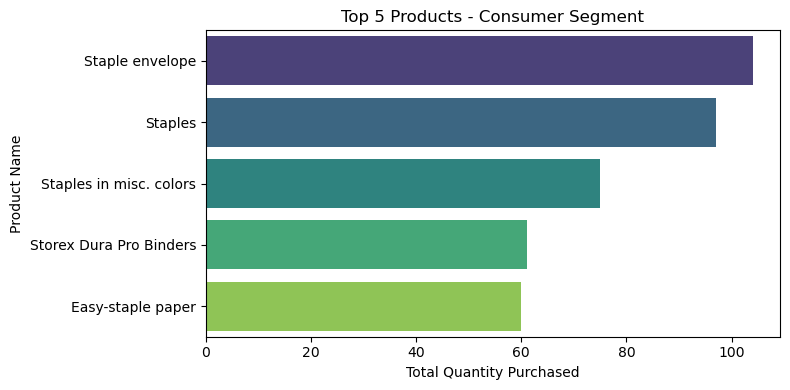

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/3733540302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product Name', data=top, palette='viridis')


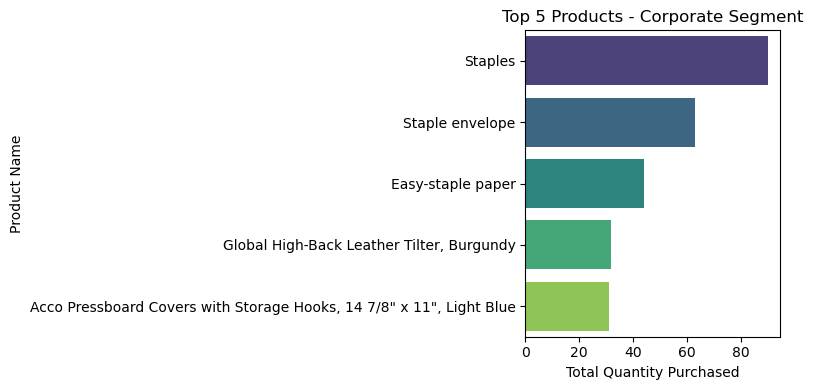

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/3733540302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product Name', data=top, palette='viridis')


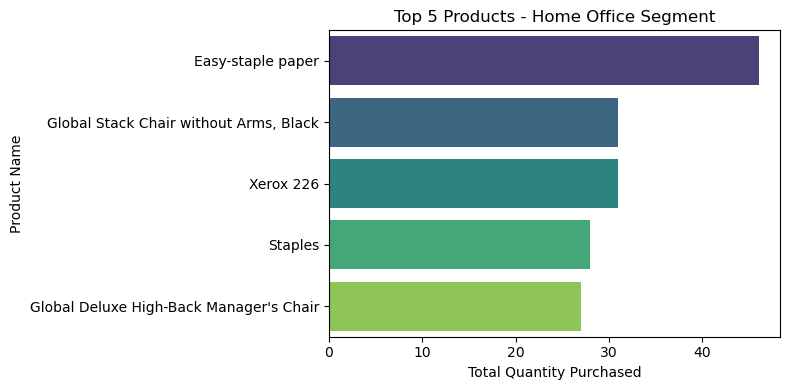

In [447]:
# Agrupar por segmento y producto, sumando la cantidad
segment_top_products = df.groupby(['Segment', 'Product Name'])['Quantity'].sum().reset_index()

for segment in df['Segment'].unique():
    top = top_products_by_segment[top_products_by_segment['Segment'] == segment].head(top_n)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x='Quantity', y='Product Name', data=top, palette='viridis')
    plt.title(f'Top {top_n} Products - {segment} Segment')
    plt.xlabel('Total Quantity Purchased')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()


- In terms of specific products, Staple envelope and Staples are consistently top-performing items in both the Consumer and Corporate segments, showing cross-segment popularity. Meanwhile, Easy-staple paper appears among the top products in all three segments, suggesting it’s a universally high-demand item.

Insights: All segments prioritize Office Supplies, with Easy-staple paper as a common top product. Consumers buy the most; Corporate adds specialized items, while Home Office focuses on ergonomic, personal-use products. This suggests that simple, functional, and low-cost products are in high demand across all customer types, regardless of their size or purpose.

### 4.4 Discount Effectiveness & Risk Analysis


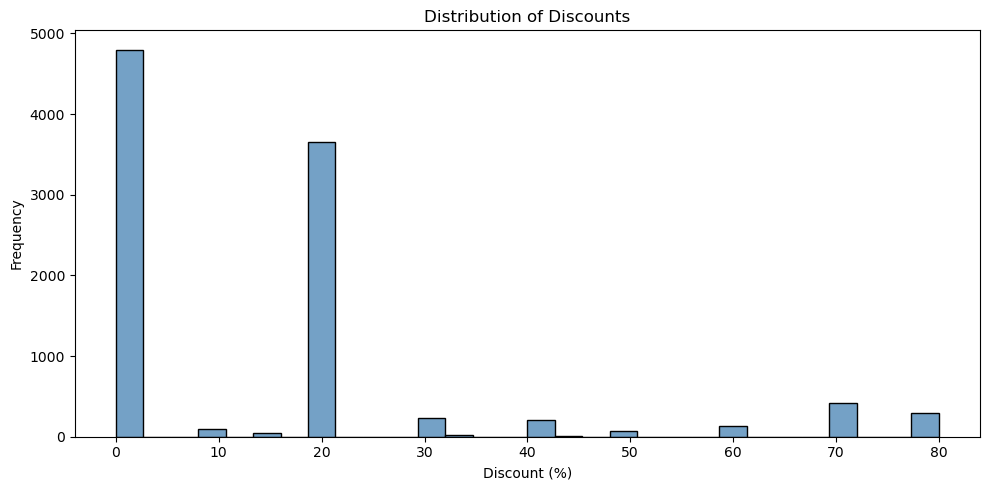

In [246]:
plt.figure(figsize=(10,5))
sns.histplot(df['Discount (%)'], bins=30, color='steelblue')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most discounts fall at 0% and 20%, showing that these are the most commonly applied rates. However, very high discounts of 70% and 80%, though rare, still occur and may signal risky pricing practices. The distribution is clearly skewed toward low discount levels.

/var/folders/hy/yn4h0w_x7x1dtnhxt9y0skmr0000gn/T/ipykernel_42445/2522358384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_profit_avg.index, y=discount_profit_avg.values, palette='coolwarm')


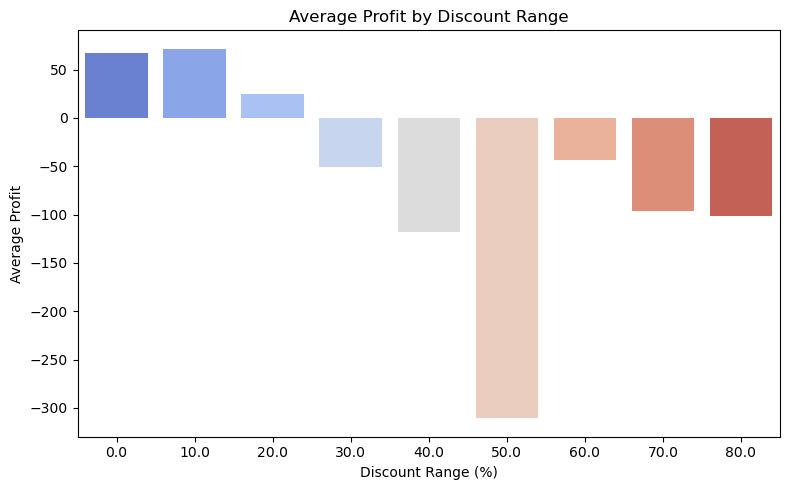

In [297]:
df['Discount Range'] = (df['Discount (%)'] // 10) * 10
discount_profit_avg = df.groupby('Discount Range')['Profit'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=discount_profit_avg.index, y=discount_profit_avg.values, palette='coolwarm')
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range (%)')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

While low discounts (0–10%) generate strong average profit, discounts above 30% consistently result in negative average profit. Surprisingly, the 50% discount range causes the highest average loss, making it the most damaging level despite not being the most frequent. This suggests that moderate discounts can be more harmful than extreme ones if misapplied.

In [541]:
# 4.2 Risk Label: Define if discount is greater than profit margin
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
df['Discount (%)'] = df['Discount'] * 100  # Ensure correct scale
df['Loss Risk'] = df['Discount (%)'] > df['Profit Margin (%)']

# Count of products at risk
risk_counts = df['Loss Risk'].value_counts()
print(f"Products at loss risk: {risk_counts[True]:,}")
print(f"Products NOT at risk: {risk_counts[False]:,}")

Products at loss risk: 3,341
Products NOT at risk: 6,653


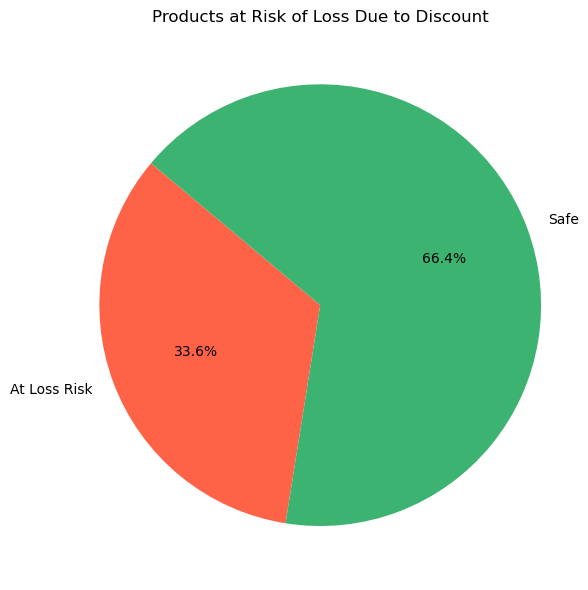

In [342]:
#Visual: Pie chart of risk distribution
labels = ['At Loss Risk', 'Safe']
sizes = [risk_counts[True], risk_counts[False]]
colors = ['tomato', 'mediumseagreen']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Products at Risk of Loss Due to Discount')
plt.axis('equal')
plt.tight_layout()
plt.show()

About 33.6% of products are sold at a loss, meaning the applied discount was higher than the profit margin. This highlights a major issue with pricing strategy, as 1 in 3 products is being discounted unsustainably.

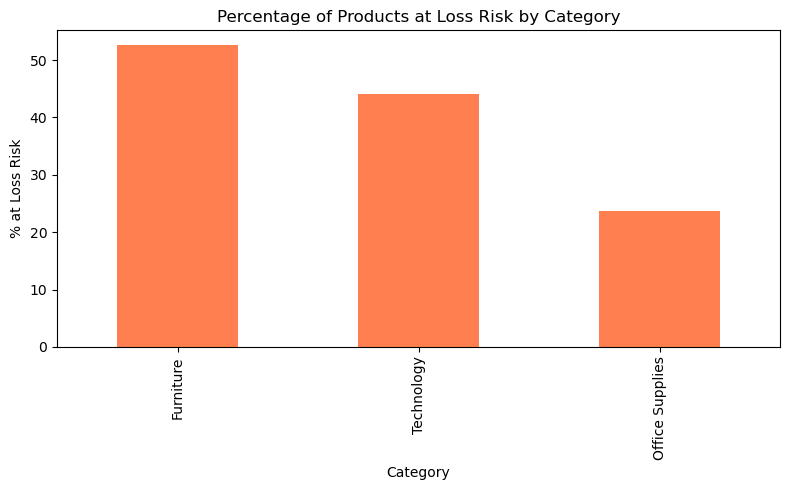

In [359]:
#Category Risk Analysis
category_risk = df[df['Loss Risk']].groupby('Category')['Product Name'].count()
category_total = df.groupby('Category')['Product Name'].count()
risk_by_category = (category_risk / category_total * 100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
risk_by_category.plot(kind='bar', color='coral')
plt.title('Percentage of Products at Loss Risk by Category')
plt.ylabel('% at Loss Risk')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

Furniture is the most exposed category, with over 50% of its products at loss risk, followed by Technology. Office Supplies are relatively safer. This indicates that discounting practices should be reassessed particularly for Furniture and Technology.

### 4.5 Discount vs Profit Margin

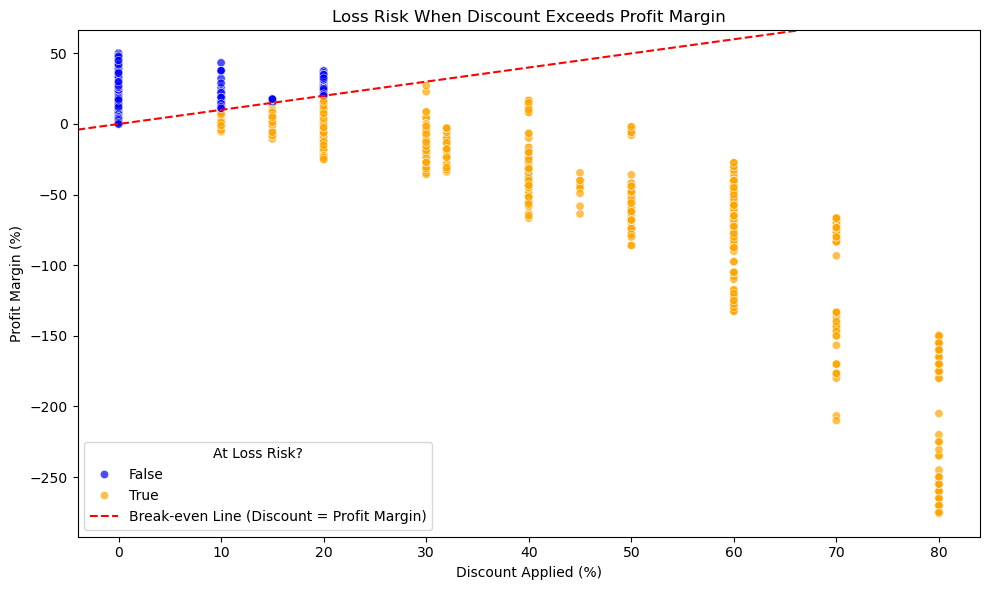

In [493]:
df['Loss Risk'] = df['Discount (%)'] > df['Profit Margin (%)']
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='Discount (%)', 
    y='Profit Margin (%)', 
    hue='Loss Risk', 
    palette={False: 'blue', True: 'orange'}, 
    alpha=0.7
)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Break-even Line (Discount = Profit Margin)')

plt.title('Loss Risk Due to Excessive Discounts Over Profit Margins')
plt.title('Loss Risk When Discount Exceeds Profit Margin')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Profit Margin (%)')
plt.legend(title='At Loss Risk?')
plt.tight_layout()
plt.show()

All orange dots below the red break-even line represent products where discounts exceeded profit margins, leading to losses. The concentration of orange points grows after 30% discounts, confirming that these are consistently unprofitable thresholds.

#### Actual vs Sustainable Discount

Is Discount Unsafe?
False    6636
True     3358
Name: count, dtype: int64


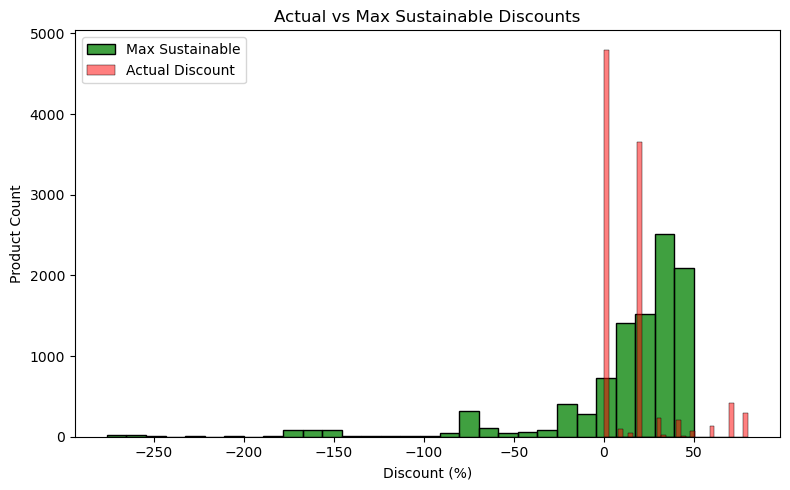

In [214]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
df['Max Sustainable Discount (%)'] = df['Profit Margin (%)']
df['Max Safe Discount (%)'] = df['Profit Margin (%)'] * 0.8
df['Is Discount Unsafe?'] = df['Discount (%)'] > df['Max Sustainable Discount (%)']
print(df['Is Discount Unsafe?'].value_counts())


plt.figure(figsize=(8,5))
sns.histplot(df['Max Sustainable Discount (%)'], bins=30, color='green', label='Max Sustainable')
sns.histplot(df['Discount (%)'], bins=30, color='red', label='Actual Discount', alpha=0.5)
plt.legend()
plt.title('Actual vs Max Sustainable Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Product Count')
plt.tight_layout()
plt.show()

The histogram shows that many products received discounts that exceeded their sustainable threshold (red bars surpassing green). This reinforces that actual discounting often goes beyond what’s financially safe, especially around 20–50%, placing thousands of products at financial risk.

### 4.6 Product-Level Performance


#### Top-selling products (by quantity)

In [325]:
top_products = df.groupby('Product Name', as_index=False).agg({
    'Quantity': 'sum',
    'Profit': 'sum'
})
top_products = top_products.sort_values(by='Quantity', ascending=False)
top_products.head(10)

,Product Name,Quantity,Profit
1499,Staples,215,292.23
1493,Staple envelope,170,751.60
537,Easy-staple paper,150,1096.00
1500,Staples in misc. colors,86,124.06
942,KI Adjustable-Height Table,74,-248.50
259,Avery Non-Stick Binders,71,43.54
1511,Storex Dura Pro Binders,71,50.53
699,GBC Premium Transparent Covers with Diagonal L...,67,49.51
1450,"Situations Contoured Folding Chairs, 4/Set",64,234.23
1497,Staple-based wall hangings,62,121.98


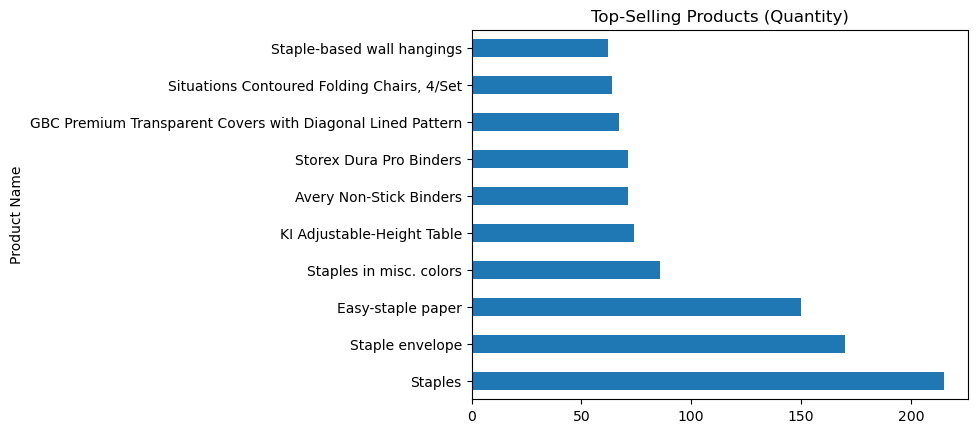

In [327]:
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top-Selling Products (Quantity)')
plt.show()

Staples, Staple envelopes, and Easy-staple paper are the most frequently purchased items, indicating high demand for basic office supplies. However, not all top-selling products are profitable—e.g., the KI Adjustable-Height Table generates losses despite high sales.

#### Most loss-making products

In [330]:
loss_products = df.groupby('Product Name').agg(
    Total_Profit=('Profit', 'sum'),
    Sales_Count=('Product Name', 'count'),
    Avg_Discount=('Discount (%)', 'mean'),
    Avg_Sales=('Sales', 'mean')
).sort_values('Total_Profit')

loss_products.head(10)

,Total_Profit,Sales_Count,Avg_Discount,Avg_Sales
Product Name,,,,
Cubify CubeX 3D Printer Double Head Print,-8879.97,3,53.333333,3699.983333
Lexmark MX611dhe Monochrome Laser Printer,-4589.97,4,40.000000,4207.472500
Cubify CubeX 3D Printer Triple Head Print,-3839.99,1,50.000000,7999.980000
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.11,5,28.000000,1983.528000
Bush Advantage Collection Racetrack Conference Table,-1934.40,7,35.000000,1363.531429
GBC DocuBind P400 Electric Binding System,-1878.17,6,45.000000,2994.178333
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.08,1,50.000000,22638.480000
Martin Yale Chadless Opener Electric Letter Opener,-1299.19,6,10.000000,2776.035000
Balt Solid Wood Round Tables,-1201.06,4,20.000000,1629.690000


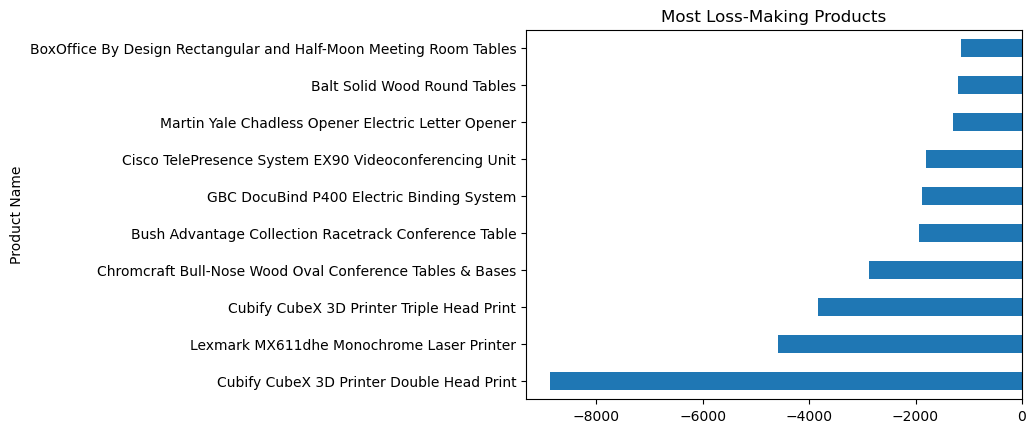

In [319]:
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
loss_products.plot(kind='barh', title='Most Loss-Making Products')
plt.show()

Items like Cubify 3D Printers and Lexmark Laser Printers generate the greatest losses, often exceeding $4,000 due to high discounts and low sales volume. Bulky furniture products such as conference and room tables also appear frequently, suggesting that discounting strategies for expensive, low-frequency items are inefficient and contribute significantly to overall profit loss.

### 4.7 Temporal Trends & Seasonality

#### Seasonality trends (Monthly / Weekly Orders)

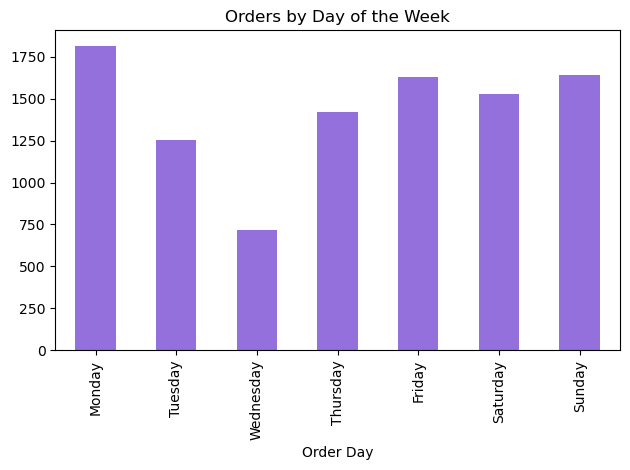

In [553]:
orders_by_day = df['Order Day'].value_counts().sort_index()
orders_by_day = df['Order Day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
orders_by_day.plot(kind='bar', title='Orders by Day of the Week', color='mediumpurple')
plt.tight_layout()
plt.show()

Orders peak on Monday, making it the busiest day of the week, while Wednesday sees the lowest activity. Weekend days (Saturday and Sunday) show relatively strong performance, suggesting customer activity remains high outside traditional business days.

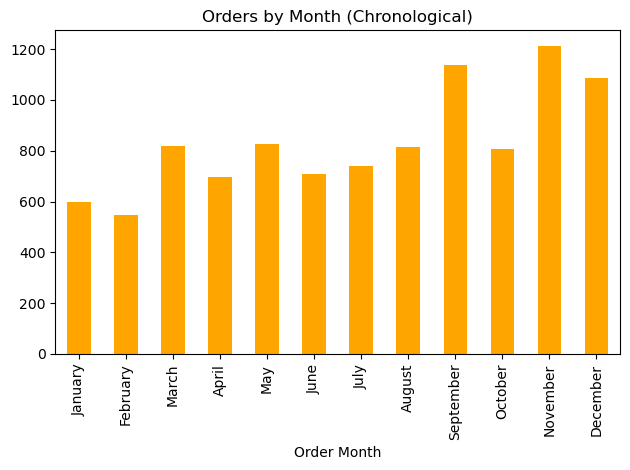

In [110]:
orders_by_month = df['Order Month'].value_counts().sort_index()
orders_by_month = df['Order Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])

orders_by_month.plot(kind='bar', title='Orders by Month (Chronological)', color='orange')
plt.tight_layout()
plt.show()

Order volume increases steadily throughout the year, with a noticeable surge in October and November, followed by a slight drop in December. This indicates strong demand in Q4, likely influenced by end-of-year business cycles or seasonal promotions.

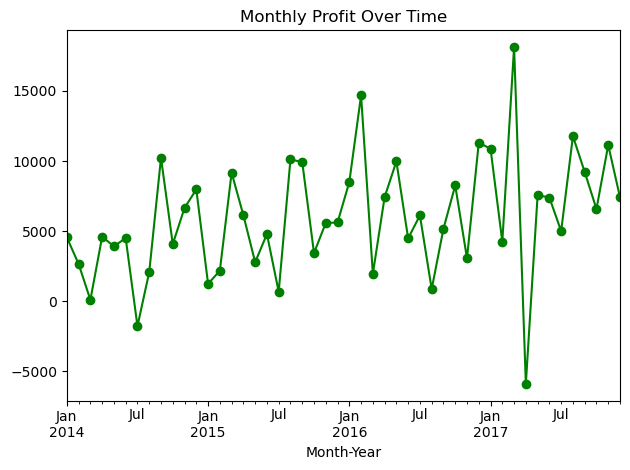

In [495]:
monthly_profit = df.groupby('Month-Year')['Profit'].sum()
monthly_profit.plot(kind='line', marker='o', title='Monthly Profit Over Time', color='green')
plt.tight_layout()
plt.show()

Profit trends show consistent fluctuation but generally increase over time, with a significant spike in early 2016 and a dip around mid-2017. These seasonal shifts highlight the importance of tracking monthly performance to optimize pricing and operations.

### 4.8 Shipping Performance

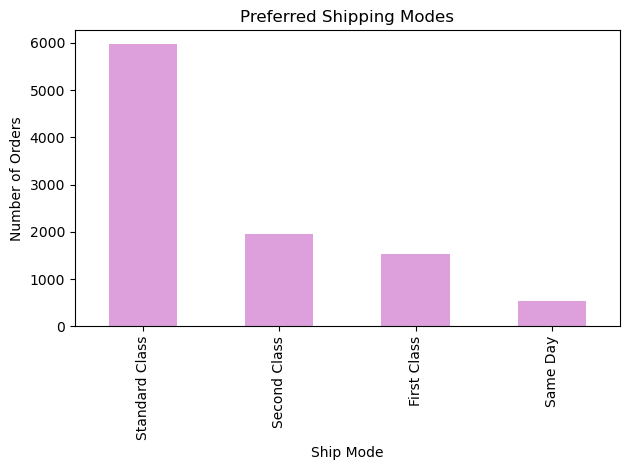

In [115]:
df['Ship Mode'].value_counts().plot(kind='bar', title='Preferred Shipping Modes', color='plum')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


Pedidos 0-30 días: 5362 (53.65%)
Shipping Delay > 30: 2924 (29.26%)
Shipping Delay < 0 (error): 1708 (17.09%)


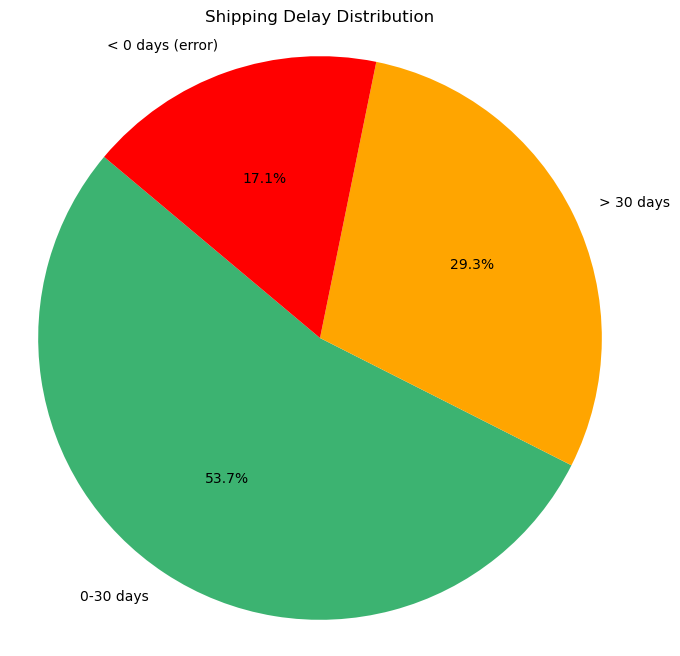

In [47]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

negative_rows = df[df['Shipping Delay'] < 0].shape[0]
rows_0_30 = df[(df['Shipping Delay'] >= 0) & (df['Shipping Delay'] <= 30)].shape[0]
over_30_rows = df[df['Shipping Delay'] > 30].shape[0]
total_rows = df.shape[0]

percent_0_30 = (rows_0_30 / total_rows) * 100
percent_over_30 = (over_30_rows / total_rows) * 100
percent_negative = (negative_rows / total_rows) * 100

print(f"Pedidos 0-30 días: {rows_0_30} ({percent_0_30:.2f}%)")
print(f"Shipping Delay > 30: {over_30_rows} ({percent_over_30:.2f}%)")
print(f"Shipping Delay < 0 (error): {negative_rows} ({percent_negative:.2f}%)")

labels = ['0-30 days', '> 30 days', '< 0 days (error)']
sizes = [percent_0_30, percent_over_30, percent_negative]
colors = ['mediumseagreen', 'orange', 'red']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Shipping Delay Distribution')
plt.axis('equal')
plt.show()

**Important Note:**

After exploring Shipping Delay, it was found that the 'Ship Date' column in the Superstore Sample dataset is not reliable.
- Many records contain inconsistent dates.
- Some product categories (Office Supplies) show unrealistically high shipping delays.
- This dataset is not designed for real logistics analysis.

For this reason, Shipping Delay will not be used in the main analysis.

## 5. KPI's

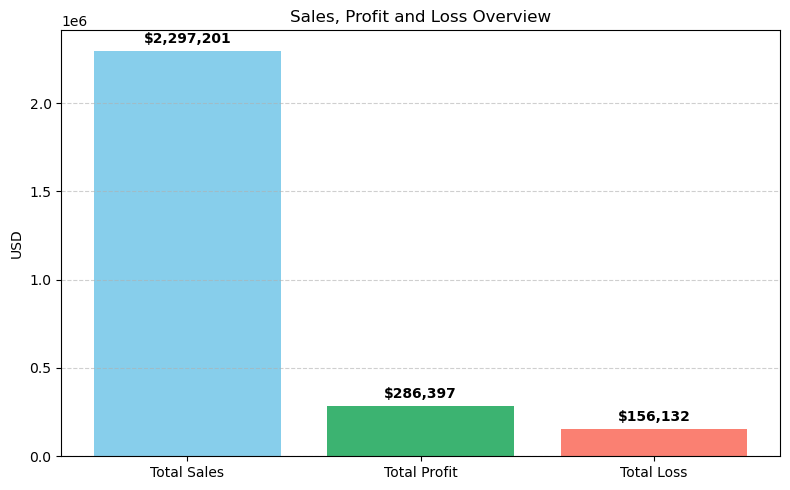

In [392]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_loss = df[df['Profit'] < 0]['Profit'].sum()

metrics = ['Total Sales', 'Total Profit', 'Total Loss']
values = [total_sales, total_profit, abs(total_loss)]  # Usamos abs() para que el valor negativo se vea bien en la barra

colors = ['skyblue', 'mediumseagreen', 'salmon']

plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title('Sales, Profit and Loss Overview')
plt.ylabel('USD')
plt.grid(axis='y', linestyle='--', alpha=0.6)


for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.02, f"${v:,.0f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

The company generated 2.3 million dollars in total sales, of which 286,397 dollars is profit and 156,132 dollars represents losses. While overall revenue is strong, the loss amount equals more than half of the total profit, highlighting a need to review pricing, discounts, or cost strategies to improve profit margins.

In [539]:
df.to_csv("Superstore_Cleaned.csv", index=False)

# 6. Limitations

- No time component included
The dataset lacks date or time features, making it impossible to detect trends, seasonality, or the impact of time-sensitive promotions on discounts or profits.
- No cost information available
We only observe sales and profit, but not the cost of goods sold (COGS). This limits the ability to evaluate the true margin structure or suggest optimal pricing strategies.
- Limited customer-level granularity
The dataset doesn’t include customer IDs or lifetime value indicators, which makes it difficult to tailor discounts based on customer retention or profitability over time.
- Missing marketing variables
We don’t know if certain discounts were part of campaigns, bundled offers, or customer-specific deals. This could lead to inaccurate interpretation of “high discount” as necessarily bad.
- Potential outliers and data quality issues
Products with extremely high or low unit prices, as well as discounts applied to low-priced items, may distort model training. Although some clipping was applied, data noise remains.
- Profit values may include returns or adjustments
The profit field may be affected by returned items, adjustments, or post-sale activities not clearly indicated in the dataset.
- Imbalanced representation of products
Some products appear very frequently, while others have only a few transactions. This could bias the model toward over-represented items.

# 7. Conclusions & Recommendations

## Conclusions


Profitability varies significantly across customer segments, product categories, and regions. The Consumer segment consistently generates the highest profit, making it the most valuable target, while the Home Office segment contributes the least. Among product categories, Technology stands out as the most profitable, followed by Office Supplies, whereas Furniture regularly underperforms and shows a high proportion of loss-making items. Geographically, the West and East regions are the most profitable, while the Central region lags and may require strategic reassessment.

Heavy discounting is a major source of financial loss. Around 33.6% of products are sold at a loss because the applied discount exceeds their profit margin. Discounts above 30% consistently result in negative average profits, with the 50% discount range causing the highest average loss. High-ticket items such as 3D printers and conference tables are particularly risky — often incurring losses between 4,000 and 8,000 dollars per item due to aggressive discounting practices that aren’t offset by sufficient sales volume.

Finally, high sales volume doesn’t always guarantee profitability. Products like Staples and Easy-Staple Paper are among the top sellers in quantity, but not all high-demand items generate adequate profit. Similarly, cities such as Philadelphia demonstrate high sales figures yet suffer from negative profit margins, suggesting pricing inefficiencies, elevated operational costs, or poorly optimized discount policies.

---

## Recommendations

To maximise profitability, Superstore should focus on the Consumer segment, which consistently drives the highest returns. Loyalty programs, personalised marketing, and bundled offers—particularly for high-demand Office Supplies—can further increase engagement and sales within this segment. Additionally, product-level performance suggests an opportunity to refine assortment planning, emphasising items that combine high sales volume with reliable profit margins.

Discounting practices must be brought under stricter control. Discounts exceeding 30% have proven consistently unprofitable, especially for high-value, low-volume items. A “Max Safe Discount” should be calculated based on each product’s historical profit margin, and discounts surpassing this threshold should trigger alerts or manual review. Strengthening pricing governance through automated rules and educating sales teams on the financial impact of over-discounting will help mitigate risk and preserve margin integrity.

It’s also crucial to reassess the Furniture and certain Technology sub-categories, as they contain a high concentration of loss-making products. Inventory levels for items like Tables, Bookcases, and 3D Printers should be reviewed and possibly reduced, or supplier agreements renegotiated. Regionally, Superstore should continue investing in New York, Los Angeles, and Seattle**, which demonstrate healthy profit-to-sales ratios, while re-evaluating its position in the Central region. Finally, although not central to this analysis, addressing inconsistencies in shipping delay data could support customer satisfaction and long-term retention.

Optimising pricing and focusing on high-return segments can significantly improve profitability. Strategic action on product, pricing, and geography is key to sustainable growth.